# Tracer Boundary Indexing

* A notebook of where to set the tracer boundary

In [1]:
import sys
sys.path.insert(0, '_libs/')
import NEMO_tools as Nts

In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [3]:
reload(Nts)

<module 'NEMO_tools' from '_libs/NEMO_tools.pyc'>

In [4]:
coordinate_name=glob.glob('_data/NEMO/ORCA2_INPUT/coordinates*.nc')
print("found file: \n{}".format(coordinate_name))
coordinate_obj=nc.Dataset(coordinate_name[0])

found file: 
['_data/NEMO/ORCA2_INPUT\\coordinates.nc']


In [5]:
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]

In [6]:
field = np.zeros(nav_lon.shape)
#BSlon=np.arange(-175, -161, 2); BSlat=67*np.ones(BSlon.shape)
#x_BS, y_BS = Nts.nearest_search(nav_lon, nav_lat, BSlon, BSlat)
y_BS = np.array([55, 56])
x_BS = 122*np.ones(y_BS.shape).astype(int)
BFlon=np.arange(-69, -53, 2); BFlat=67*np.ones(BFlon.shape)
x_BF, y_BF = Nts.nearest_search(nav_lon, nav_lat, BFlon, BFlat)
x_BF = 123*np.ones(x_BF.shape).astype(int)
FS1lon=np.arange(-43, -23, 2); FS1lat=67*np.ones(FS1lon.shape)
FS2lon=np.arange(-15, 11, 2); FS2lat=67*np.ones(FS2lon.shape)
x_FS1, y_FS1 = Nts.nearest_search(nav_lon, nav_lat, FS1lon, FS1lat)
x_FS1 = 121*np.ones(x_FS1.shape).astype(int)
x_FS2, y_FS2 = Nts.nearest_search(nav_lon, nav_lat, FS2lon, FS2lat)
x_FS2 = 121*np.ones(x_FS2.shape).astype(int)

LBlon=np.arange(-97, -75, 1); LBlat=67*np.ones(LBlon.shape)
x_LB, y_LB = Nts.nearest_search(nav_lon, nav_lat, LBlon, LBlat)
x_LB = 125*np.ones(x_LB.shape).astype(int)

field[x_BS, y_BS]=1; field[x_BF, y_BF]=1; field[x_FS1, y_FS1]=1; field[x_FS2, y_FS2]=1; field[x_LB, y_LB]=1

In [7]:
print('Bering Strait: [122], {}'.format(y_BS))
print('Bafin Bay:     [123], {}'.format(y_BF))
print('Fram Strait:   [121], {}{}'.format(y_FS1, y_FS2))
print('Lablador Sea:  [125], {}'.format(y_LB))

Bering Strait: [122], [55 56]
Bafin Bay:     [123], [111 112 113 114 114 115 116 117]
Fram Strait:   [121], [122 122 123 124 125 126 126 127 128 129][133 133 134 135 136 136 137 138 139 139 140 141 142]
Lablador Sea:  [125], [ 95  96  97  98  99  99 100 101 101 102 102 103 104 104 105 105 106 106
 106 107 107 108]


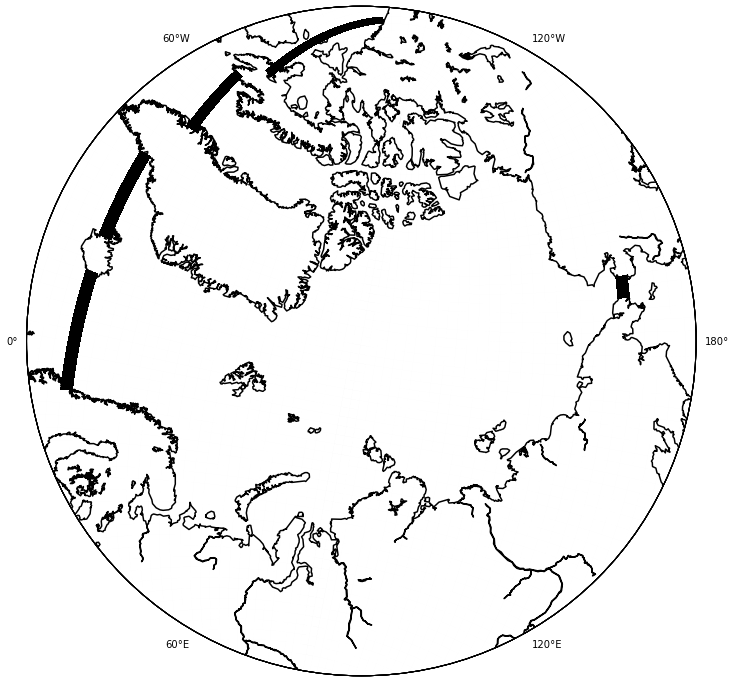

In [8]:
fig=plt.figure(figsize=(12, 12)); ax=plt.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
#proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y = proj(nav_lon, nav_lat)
proj.pcolor(x, y, field, cmap=plt.cm.gray_r)
proj.plot(x, y, 'k-', linewidth=0.01, alpha=0.25);
proj.plot(x.T, y.T, 'k-', linewidth=0.01, alpha=0.25)
#ax.set_title('Tracer Boundary', fontsize=14)
plt.show()
#fig.savefig('Publish/Barium_boundary.pdf', dpi=600, orientation='portrait', papertype='a4', format='pdf',
#            transparent=False, bbox_inches='tight', pad_inches=0)

In [9]:
field = field*50

In [10]:
field.shape

(149L, 182L)

In [11]:
field[field==0]=-999.0
Ba_boundary = np.ones([12, 149, 182])
for i in range(12):
    Ba_boundary[i, :, :]=field

In [12]:
save_var = { 'Ba_boundary': Ba_boundary}
scipy.io.savemat('_data/Exchange/Ba_boundary.mat', mdict=save_var)